In [91]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yaml

In [3]:
ls ../benchmark_output_default

goes_benchmark_data_20200316_135425.yml  gpu_04_training_stats.csv
gpu_01_training_stats.csv                gpu_08_training_stats.csv
gpu_02_training_stats.csv


In [89]:
gpu_stats = {}
num_gpus = [1, 2, 4, 8]
for num_gpu in num_gpus:
    gpu_stats[num_gpu] = pd.read_csv(f"../benchmark_output_default_20200315_all/gpu_{num_gpu:02d}_training_stats.csv", index_col="time")
    gpu_stats[num_gpu].index = gpu_stats[num_gpu].index - gpu_stats[num_gpu].index[0]

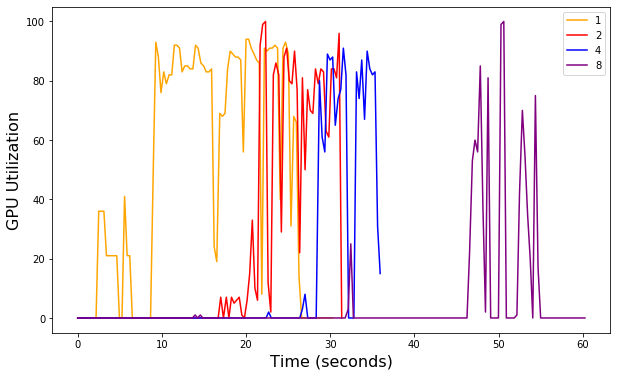

In [90]:
plt.figure(figsize=(10, 6))
colors = ["orange", "red", "blue", "purple"]
for n, num_gpu in enumerate(num_gpus):
    plt.plot(gpu_stats[num_gpu].index, gpu_stats[num_gpu]["gpu_util_percent_0"], label=str(num_gpu), color=colors[n])
plt.xlabel("Time (seconds)", fontsize=16)
plt.ylabel("GPU Utilization", fontsize=16)
plt.legend()
plt.savefig("gpu_0_util_goes16ci.png", dpi=200, bbox_inches="tight")

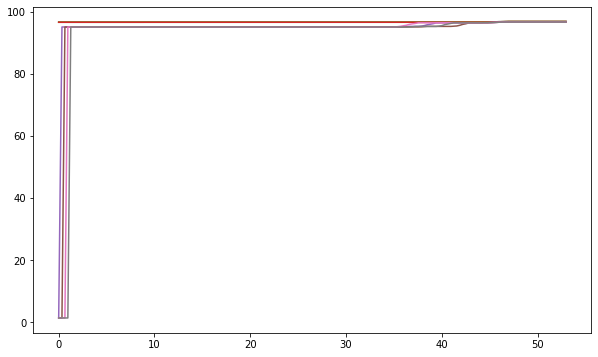

In [62]:
plt.figure(figsize=(10, 6))
num_gpu = 8
for n in range(8):
    plt.plot(gpu_stats[num_gpu].index, gpu_stats[num_gpu][f"gpu_memory_used_percent_{n:d}"], label=n)

Text(0.5, 0, 'Time (seconds)')

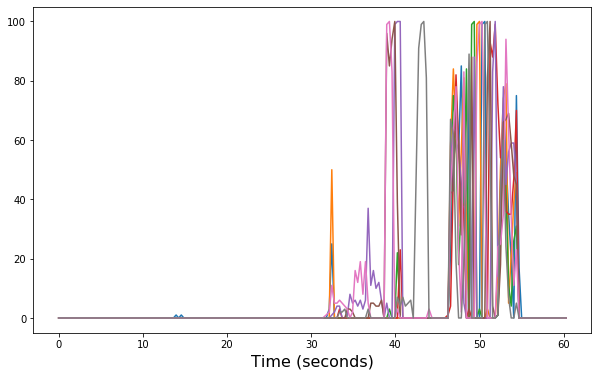

In [86]:
plt.figure(figsize=(10, 6))
num_gpu = 8
for n in range(8):
    plt.plot(gpu_stats[num_gpu].index, gpu_stats[num_gpu][f"gpu_util_percent_{n:d}"], label=n)
plt.xlabel("Time (seconds)", fontsize=16)


In [67]:
epoch_durations = [9.30, 4.20, 2.74, 2.85]

In [77]:
2.74 / 9.3

0.2946236559139785

In [80]:
3.80 / 8.16

0.4656862745098039

In [82]:
(9.3 - 4.20) / 9.3

0.5483870967741936

In [92]:
with open("../benchmark_output_default_20200315_all/goes_benchmark_data_20200316_171925.yml") as stat_file:
    stats = yaml.load(stat_file)

/glade/u/home/dgagne/miniconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:2: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  


In [98]:

stats["cpu_training"]["epoch_duration"] 

111.55459533073008

In [97]:
stats["gpu_01_training"]["epoch_duration"]

8.391701877117157

In [99]:
stats["gpu_02_training"]["epoch_duration"]

4.058620265219361

In [100]:
stats["gpu_04_training"]["epoch_duration"]

2.9838803499005735

In [101]:
stats["gpu_08_training"]["epoch_duration"]

2.3860947228968143